# Install and import kaggle library
Kaggle library is useful to connect to kaggle website and download datasets to local computer. 

In [1]:
!pip install kaggle

In [2]:
import kaggle

# Download ecommerce datasets from kaggle website using kaggle library
## Follow below steps before using kaggle library
    1. Login to kaggle, go to settings and create new token
    2. This will download kaggle.json
    3. Now place this file to <home directory>/.kaggle folder

In [3]:
kaggle.api.authenticate()

In [4]:
kaggle.api.dataset_download_files('desalegngeb/students-exam-scores', path='.', unzip=True, quiet=False)

Dataset URL: https://www.kaggle.com/datasets/desalegngeb/students-exam-scores


100%|████████████████████████████████████████████████████████████████████████████████| 695k/695k [00:00<00:00, 630MB/s]

## Check the downloaded files using os library

In [5]:
import os

In [8]:
os.listdir()

['.ipynb_checkpoints',
 'Expanded_data_with_more_features.csv',
 'Original_data_with_more_rows.csv',
 'Student Performance Analysis.ipynb']

In [9]:
os.rename('Expanded_data_with_more_features.csv','student_scores.csv')

In [10]:
os.listdir()

['.ipynb_checkpoints',
 'Original_data_with_more_rows.csv',
 'Student Performance Analysis.ipynb',
 'student_scores.csv']

# Check the file data using pandas dataframe and make corrections fi required

In [11]:
import pandas as pd
import numpy as np

In [12]:
df = pd.read_csv('student_scores.csv')
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## Drop unnamed column

In [13]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## Rename columns

In [14]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [15]:
df.columns = ['gender', 'ethnic_group', 'parent_education', 'lunch_type', 'test_preparation',
              'parent_marital_status', 'practice_sport', 'is_first_child', 'no_of_siblings',
              'transport_means', 'weekly_study_hours', 'math_score', 'reading_score', 'writing_score']
df.head()

,gender,ethnic_group,parent_education,lunch_type,test_preparation,parent_marital_status,practice_sport,is_first_child,no_of_siblings,transport_means,weekly_study_hours,math_score,reading_score,writing_score
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


# Load the environment variables (database details) using dotenv and os libraries
Create a **.env** file and add the environment variables to this file for security purpose.<br>
**Examples:**<br>
mssql=mssql://<code>dbname</code>/<code>schemaname</code>?driver=ODBC+DRIVER+17+FOR+SQL+SERVER <br>
userid=<code>userid</code><br>
password=<code>password</code>

**Note:** Do not enclose variable information into single quotes.

In [16]:
import dotenv

In [17]:
dotenv.load_dotenv()
mssql_db = os.getenv('mssql')

# Create database connection using sqlalchemy

In [18]:
from sqlalchemy import create_engine, text
engine = create_engine(mssql_db)
conn = engine.connect()

# Create functions 
* Create function to map python data type to SQL Server data type
* Create function to generate CREATE TABLE statement
* Create function to calculate elapsed time of data loading process

In [19]:
# Map python data type to sql data type
def get_sql_dtype(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOL'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'VARCHAR'

# Generate create table statement
def create_table_stmt(df, table_name):
    col_list = []
    for col in df.columns:
        col_dtype = get_sql_dtype(df[col].dtype)

        # fetch max lengh of the column data if the column is of object type 
        # requied to provide data type length in sql server
        if df[col].dtype == 'object':
            col_len = int(df[col].str.len().max()) + 10
            col_list.append(f'{col} {col_dtype}({col_len})')
        else:
            col_list.append(f'{col} {col_dtype}')

    query = f'create table {table_name} ({', '.join(col_list)})'
    return query

# Calculate elased time in hours, minutes, seconds
def calculate_elapsed_time(start_time, end_time):
    elapsed_time = end_time - start_time
    minutes, seconds = divmod(elapsed_time.total_seconds(), 60)
    hours, minutes = divmod(minutes, 60)
    return (round(hours), round(minutes), round(seconds))

# Load student scores data to SQL Server using pandas and sqlalchemy libraries
**Approach for data load process:**
1. Generate create table statement from dataframe and execute into SQL Server
2. Load dataframe data to SQL Server
3. Calculate total time taken in loading process

In [20]:
import datetime

In [21]:
# fetch the current time before starting the load 
start_time = datetime.datetime.now()

# generate create table statement for each dataframe
table_name = 'student_performance'
create_table_query = create_table_stmt(df, table_name)
# print(create_table_query)

# execute table statement
conn.execute(text(create_table_query))
conn.commit()

# load data to sql server
df.to_sql(table_name, con=conn, index=False, if_exists='append')
print(f'Successfully loaded {table_name} data to SQL Server')

# fetch the current time after completing the load
end_time = datetime.datetime.now()

# calculate elapsed time and print total time taken to complete the load process
print(f'Total Elapsed Time: {(end_time - start_time).total_seconds()}')
hh, mi, ss = calculate_elapsed_time(start_time, end_time)
print(f'Total time taken: {hh} hrs, {mi} minutes, {ss} seconds')

Successfully loaded student_performance data to SQL Server
Total Elapsed Time: 17.579607
Total time taken: 0 hrs, 0 minutes, 18 seconds


# Close the database connection

In [22]:
conn.close()

# Enable SQL magic function
**Follow below steps to enable SQL Magic function:**
* Load libraries ipython-sql and prettytable
  <code>!pip install ipython-sql prettytable</code>
  <code>import prettytable</code>
* Enable SQL magic by loading the SQL extension <code>%load_ext sql</code>
* Fetch the database connection details from environment file using dotenv and os libraries
* Establish connection between SQL magic module and SQL Server <code>%sql $mssql_db</code>

In [23]:
!pip install ipython-sql prettytable

In [24]:
import prettytable
prettytable.DEFAULT = 'DEFAULT'

In [25]:
%load_ext sql

In [26]:
# Not needed here as information already fetched while loading data to SQL Server 
# import os, dotenv
# dotenv.load_dotenv()
# mssql_db = os.getenv('mssql')

In [27]:
%sql $mssql_db

# Import data visualization libraries

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze student performance data using below methods:
1. Pandas Dataframe
2. SQL 
3. Matplotlib/Seaborn

## 1. Statistical analysis using pandas dataframe

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   gender                 30641 non-null  object 
 1   ethnic_group           28801 non-null  object 
 2   parent_education       28796 non-null  object 
 3   lunch_type             30641 non-null  object 
 4   test_preparation       28811 non-null  object 
 5   parent_marital_status  29451 non-null  object 
 6   practice_sport         30010 non-null  object 
 7   is_first_child         29737 non-null  object 
 8   no_of_siblings         29069 non-null  float64
 9   transport_means        27507 non-null  object 
 10  weekly_study_hours     29686 non-null  object 
 11  math_score             30641 non-null  int64  
 12  reading_score          30641 non-null  int64  
 13  writing_score          30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+

In [30]:
df.describe()

,no_of_siblings,math_score,reading_score,writing_score
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


## 2. Find Total number of records

### Using dataframe

In [31]:
df.shape

(30641, 14)

### Using SQL

In [32]:
%%capture --no-display
%sql select count(*) from student_performance;

""
30641


In [33]:
%%capture --no-display
%sql SELECT count(COLUMN_NAME) FROM INFORMATION_SCHEMA.COLUMNS WHERE TABLE_NAME = 'student_performance';

""
14


## 3. Count null values in each column 

### Using dataframe

In [34]:
df.isnull().sum()

gender                      0
ethnic_group             1840
parent_education         1845
lunch_type                  0
test_preparation         1830
parent_marital_status    1190
practice_sport            631
is_first_child            904
no_of_siblings           1572
transport_means          3134
weekly_study_hours        955
math_score                  0
reading_score               0
writing_score               0
dtype: int64

### Using SQL

In [35]:
%%capture --no-display
%%sql select count(*) - count(gender) null_gender,
count(*) - count(ethnic_group) null_ethnic_group,
count(*) - count(parent_education) null_parent_education,
count(*) - count(lunch_type) null_lunch_type,
count(*) - count(test_preparation) null_test_preparation,
count(*) - count(parent_marital_status) null_parent_marital_status,
count(*) - count(practice_sport) null_practice_sport,
count(*) - count(is_first_child) null_is_first_child,
count(*) - count(no_of_siblings) null_no_of_siblings,
count(*) - count(transport_means) null_transport_means,
count(*) - count(weekly_study_hours) null_weekly_study_hours,
count(*) - count(math_score) null_math_score,
count(*) - count(reading_score) null_reading_score,
count(*) - count(writing_score) null_writing_score
from student_performance;

null_gender,null_ethnic_group,null_parent_education,null_lunch_type,null_test_preparation,null_parent_marital_status,null_practice_sport,null_is_first_child,null_no_of_siblings,null_transport_means,null_weekly_study_hours,null_math_score,null_reading_score,null_writing_score
0,1840,1845,0,1830,1190,631,904,1572,3134,955,0,0,0


## 4. Fetch first 5 rows

### Using dataframe

In [36]:
df.head()

,gender,ethnic_group,parent_education,lunch_type,test_preparation,parent_marital_status,practice_sport,is_first_child,no_of_siblings,transport_means,weekly_study_hours,math_score,reading_score,writing_score
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


### Using SQL

In [37]:
%%capture --no-display
%sql select top 5 * from student_performance;

gender,ethnic_group,parent_education,lunch_type,test_preparation,parent_marital_status,practice_sport,is_first_child,no_of_siblings,transport_means,weekly_study_hours,math_score,reading_score,writing_score
female,None,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
female,group C,some college,standard,None,married,sometimes,yes,0.0,None,5 - 10,69,90,88
female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
male,group A,associate's degree,free/reduced,none,married,never,no,1.0,None,5 - 10,45,56,42
male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


## 5. Analyze gender distribution (Count the number of records by gender)

### Using dataframe

In [38]:
df['gender'].value_counts()

gender
female    15424
male      15217
Name: count, dtype: int64

### Using SQL

In [39]:
%%capture --no-display
%%sql 
select gender, count(*) from student_performance
group by gender;

gender,
male,15217
female,15424


### Plot the gender distribution using countplot

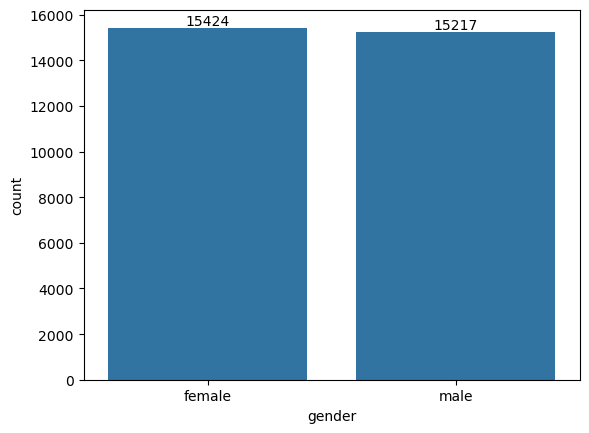

In [41]:
ax = sns.countplot(data=df, x='gender')
ax.bar_label(ax.containers[0])
plt.show()

**Conclusion:** Above chart shows that there are more female students than male.

## 6. Analyze math_score distribution

### Using dataframe - create categorical column for math_score using bins

In [42]:
bins = np.linspace(min(df['math_score']), max(df['math_score']), 11)
bins

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [43]:
# Create bins for math_score column using numpy linspace
bins = np.linspace(min(df['math_score']), max(df['math_score']), 11)

# Provide names for bins
group_names = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# add new column for binned values
df['math_score_binned'] = pd.cut(df['math_score'], bins, labels=group_names, include_lowest=True, right=False)

# additionally update records where math_score = 100 as the above statement will exclude math_score = 100 due to parameter right=False
df.loc[df['math_score'] == 100, 'math_score_binned'] = '90-100'

df.head()

,gender,ethnic_group,parent_education,lunch_type,test_preparation,parent_marital_status,practice_sport,is_first_child,no_of_siblings,transport_means,weekly_study_hours,math_score,reading_score,writing_score,math_score_binned
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,70-79
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88,60-69
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,80-89
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42,40-49
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,70-79


In [44]:
# group by math_score_binned, and count number of records for each bin
# observed is a deprecated attribute, it gives warning with default value, giving observed=True to silent the warning message
df.groupby('math_score_binned', as_index=False, observed=True).size()

,math_score_binned,size
0,0-9,7
1,10-19,41
2,20-29,234
3,30-39,1014
4,40-49,2940
5,50-59,5629
6,60-69,7395
7,70-79,6923
8,80-89,4366
9,90-100,2092


### Using SQL

In [45]:
%%capture --no-display
%%sql
select math_score_binned, count from (
select sum(case when math_score >= 0 and math_score < 10 then 1 else 0 end) score_between_0_9,
sum(case when math_score >= 10 and math_score < 20 then 1 else 0 end) score_between_10_19,
sum(case when math_score >= 20 and math_score < 30 then 1 else 0 end) score_between_20_29,
sum(case when math_score >= 30 and math_score < 40 then 1 else 0 end) score_between_30_39,
sum(case when math_score >= 40 and math_score < 50 then 1 else 0 end) score_between_40_49,
sum(case when math_score >= 50 and math_score < 60 then 1 else 0 end) score_between_50_59,
sum(case when math_score >= 60 and math_score < 70 then 1 else 0 end) score_between_60_69,
sum(case when math_score >= 70 and math_score < 80 then 1 else 0 end) score_between_70_79,
sum(case when math_score >= 80 and math_score < 90 then 1 else 0 end) score_between_80_89,
sum(case when math_score >= 90 and math_score <= 100 then 1 else 0 end) score_between_90_100
from student_performance) p
unpivot (count for math_score_binned in (score_between_0_9, score_between_10_19, score_between_20_29, score_between_30_39,
score_between_40_49, score_between_50_59, score_between_60_69, score_between_70_79, score_between_80_89, score_between_90_100)) as t1
order by math_score_binned;

math_score_binned,count
score_between_0_9,7
score_between_10_19,41
score_between_20_29,234
score_between_30_39,1014
score_between_40_49,2940
score_between_50_59,5629
score_between_60_69,7395
score_between_70_79,6923
score_between_80_89,4366
score_between_90_100,2092


### Plot math_score distribution by gender using seaborn's histogram plot - automatically creates bins

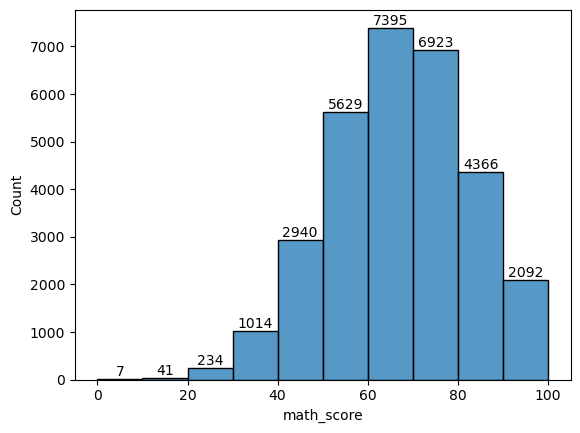

In [46]:
ax = sns.histplot(data=df, x='math_score', bins=10) 
ax.bar_label(ax.containers[0])
plt.show()

### Plot reading_score distribution using seaborn's histogram plot

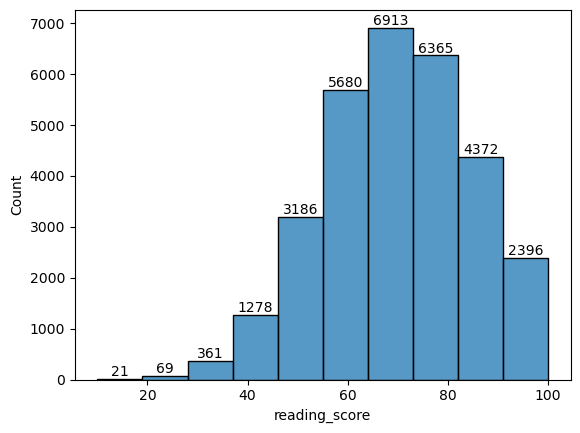

In [47]:
ax = sns.histplot(data=df, x='reading_score', bins=10)
ax.bar_label(ax.containers[0])
plt.show()

### Plot writing_score distribution using seaborn's histogram plot

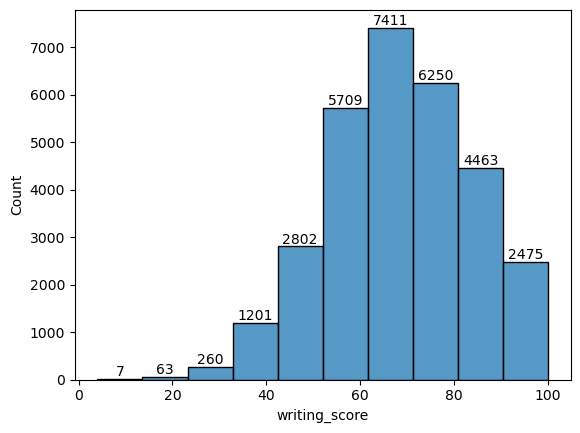

In [48]:
ax = sns.histplot(data=df, x='writing_score', bins=10)
ax.bar_label(ax.containers[0])
plt.show()

### Plot math_score, reading_score and writing_score using matplotlib's subplot functionality

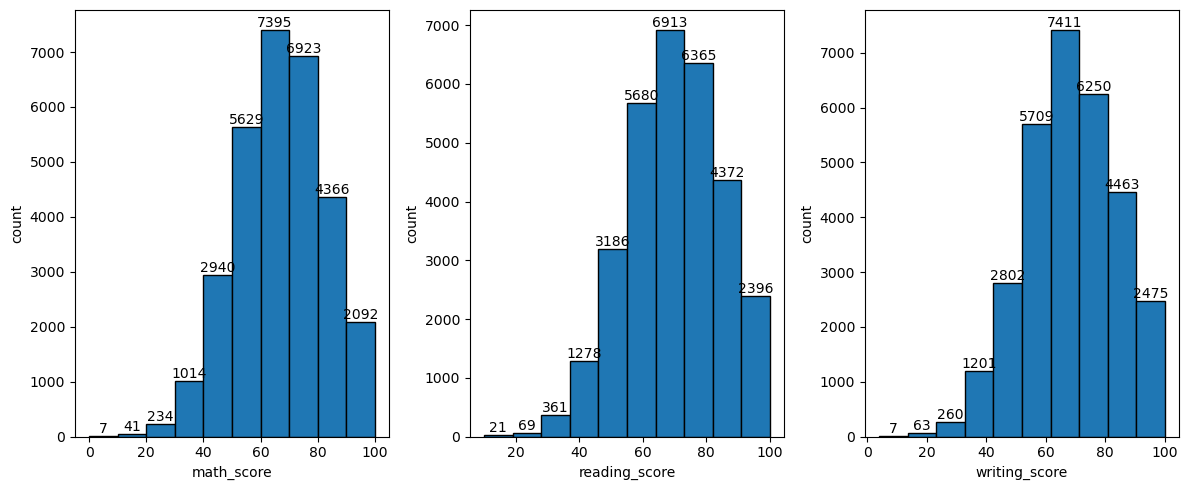

In [49]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(12,5))
axes[0].hist(df['math_score'], bins=10, edgecolor='black')
axes[0].bar_label(axes[0].containers[0])
axes[0].set_xlabel('math_score')
axes[0].set_ylabel('count')
axes[1].hist(df['reading_score'], bins=10, edgecolor='black')
axes[1].bar_label(axes[1].containers[0])
axes[1].set_xlabel('reading_score')
axes[1].set_ylabel('count')
axes[2].hist(df['writing_score'], bins=10, edgecolor='black')
axes[2].bar_label(axes[2].containers[0])
axes[2].set_xlabel('writing_score')
axes[2].set_ylabel('count')
plt.tight_layout()

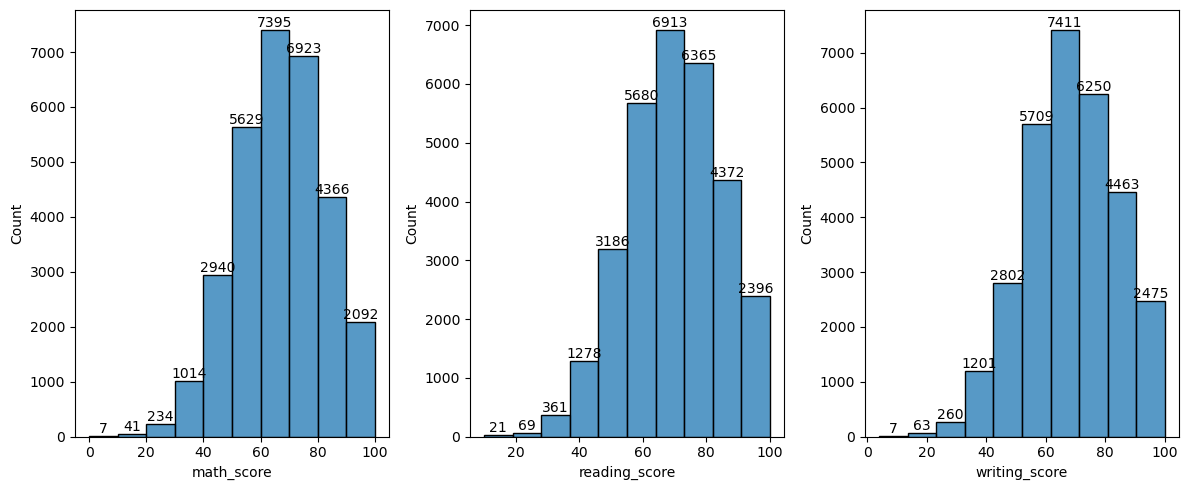

In [50]:
# Another method by using seaborn's histogram
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(12,5))
sns.histplot(data=df, x='math_score', bins=10, ax=axes[0])
axes[0].bar_label(axes[0].containers[0])
sns.histplot(data=df, x='reading_score', bins=10, ax=axes[1])
axes[1].bar_label(axes[1].containers[0])
sns.histplot(data=df, x='writing_score', bins=10, ax=axes[2])
axes[2].bar_label(axes[2].containers[0])
plt.tight_layout()

**Conclusion:** Above charts show that most students scored between 50-80 on an average in all subjects.

## 7. Analyze math_score distribution by gender

### Using dataframe

In [51]:
# group by gender and math_score_binned, and count number of records for each bin
# sort by math_score_binned and gender
# observed is a deprecated attribute, it gives warning with default value, giving observed=True to silent the warning message
df.groupby(['gender','math_score_binned'], as_index=False, observed=True).size().sort_values(['math_score_binned','gender'])

,gender,math_score_binned,size
0,female,0-9,6
10,male,0-9,1
1,female,10-19,32
11,male,10-19,9
2,female,20-29,157
12,male,20-29,77
3,female,30-39,698
13,male,30-39,316
4,female,40-49,1761
14,male,40-49,1179


### Using SQL

In [52]:
%%capture --no-display
%%sql
select gender, math_score_binned, count from (
select gender, sum(case when math_score >= 0 and math_score < 10 then 1 else 0 end) score_between_0_9,
sum(case when math_score >= 10 and math_score < 20 then 1 else 0 end) score_between_10_19,
sum(case when math_score >= 20 and math_score < 30 then 1 else 0 end) score_between_20_29,
sum(case when math_score >= 30 and math_score < 40 then 1 else 0 end) score_between_30_39,
sum(case when math_score >= 40 and math_score < 50 then 1 else 0 end) score_between_40_49,
sum(case when math_score >= 50 and math_score < 60 then 1 else 0 end) score_between_50_59,
sum(case when math_score >= 60 and math_score < 70 then 1 else 0 end) score_between_60_69,
sum(case when math_score >= 70 and math_score < 80 then 1 else 0 end) score_between_70_79,
sum(case when math_score >= 80 and math_score < 90 then 1 else 0 end) score_between_80_89,
sum(case when math_score >= 90 and math_score <= 100 then 1 else 0 end) score_between_90_100
from student_performance
group by gender) p
unpivot (count for math_score_binned in (score_between_0_9, score_between_10_19, score_between_20_29, score_between_30_39,
score_between_40_49, score_between_50_59, score_between_60_69, score_between_70_79, score_between_80_89, score_between_90_100)) as t1
order by math_score_binned, gender;

gender,math_score_binned,count
female,score_between_0_9,6
male,score_between_0_9,1
female,score_between_10_19,32
male,score_between_10_19,9
female,score_between_20_29,157
male,score_between_20_29,77
female,score_between_30_39,698
male,score_between_30_39,316
female,score_between_40_49,1761
male,score_between_40_49,1179


### Plot math_score, reading_score and writing_score distribution by gender using matplotlib's subplot and seaborn's histogram plot

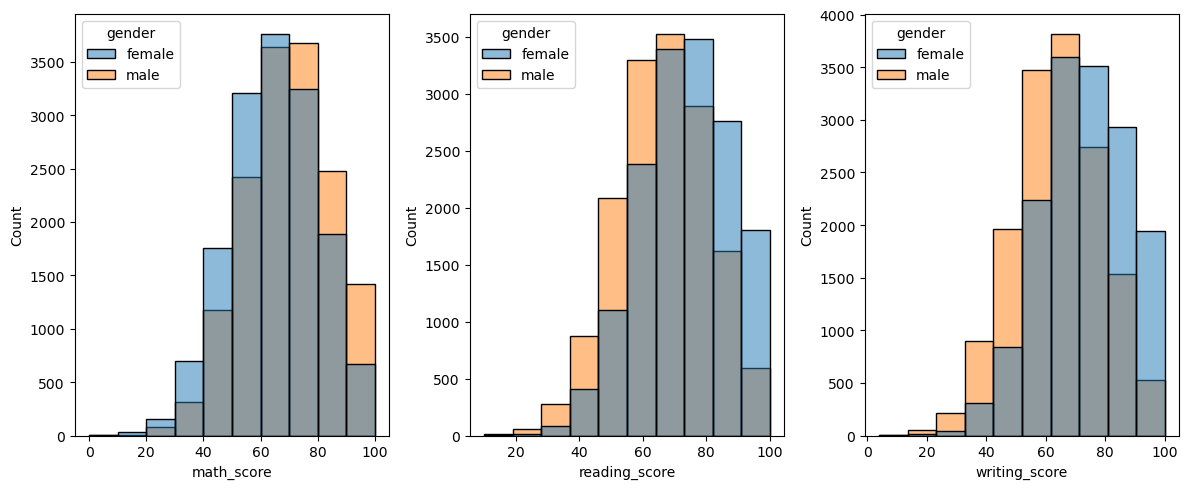

In [53]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(12,5))
sns.histplot(data=df, x='math_score', hue='gender', bins=10, ax=axes[0])
sns.histplot(data=df, x='reading_score', hue='gender', bins=10, ax=axes[1])
sns.histplot(data=df, x='writing_score', hue='gender', bins=10, ax=axes[2])
plt.tight_layout()

**Conclusion:** Above charts show that male students performed better in Maths while female students performed better in reading and writing.

## 8. Fetch distinct ethnic groups 

### Using dataframe

In [54]:
df['ethnic_group'].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

### Using SQL

In [55]:
%%capture --no-display
%sql select distinct ethnic_group from student_performance;

ethnic_group
group A
group B
group C
None
group D
group E


## 9. Analyze the distribution of ethnic group

### Using dataframe

In [56]:
df_ethnic = df['ethnic_group'].value_counts().to_frame().reset_index().sort_values('ethnic_group')
df_ethnic

,ethnic_group,count
4,group A,2219
2,group B,5826
0,group C,9212
1,group D,7503
3,group E,4041


### Using SQL

In [57]:
%%capture --no-display
%%sql 
select ethnic_group, count(*) count 
from student_performance 
where ethnic_group is not null 
group by ethnic_group 
order by ethnic_group;

ethnic_group,count
group A,2219
group B,5826
group C,9212
group D,7503
group E,4041


### Plot ethnic group distribution using matplotlib's pie chart

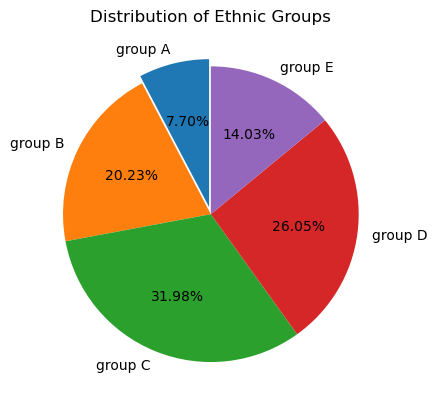

In [58]:
plt.pie(data=df_ethnic, x='count', labels='ethnic_group', autopct='%1.2f%%', startangle=90, explode=[0.05,0,0,0,0])
plt.title('Distribution of Ethnic Groups')
plt.show()

### Plot the ethinic group distribution using countplot

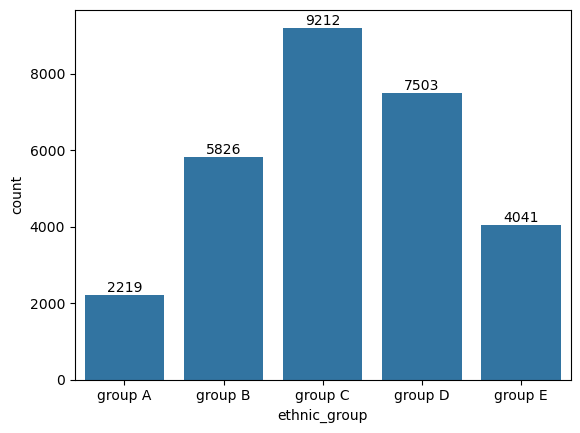

In [59]:
ax = sns.countplot(data=df, x='ethnic_group', order=['group A','group B','group C','group D','group E'])
ax.bar_label(ax.containers[0])
plt.show()

**Conclusion:** Above chart shows that the maximum number of students (31%) belong to Ethnic Group C and the least number of students (7%) belong to Ethnic Group A.

## 10. Analyze the distribution of ethnic group by gender

### Using dataframe

In [60]:
df.groupby(['ethnic_group', 'gender'], as_index=False).size()

,ethnic_group,gender,size
0,group A,female,1123
1,group A,male,1096
2,group B,female,2959
3,group B,male,2867
4,group C,female,4613
5,group C,male,4599
6,group D,female,3768
7,group D,male,3735
8,group E,female,2036
9,group E,male,2005


### Using SQL

In [61]:
%%capture --no-display
%%sql 
select ethnic_group, gender, count(*) count 
from student_performance 
where ethnic_group is not null 
group by ethnic_group, gender 
order by ethnic_group, gender;

ethnic_group,gender,count
group A,female,1123
group A,male,1096
group B,female,2959
group B,male,2867
group C,female,4613
group C,male,4599
group D,female,3768
group D,male,3735
group E,female,2036
group E,male,2005


### Plot the ethinic group distribution by gender using countplot

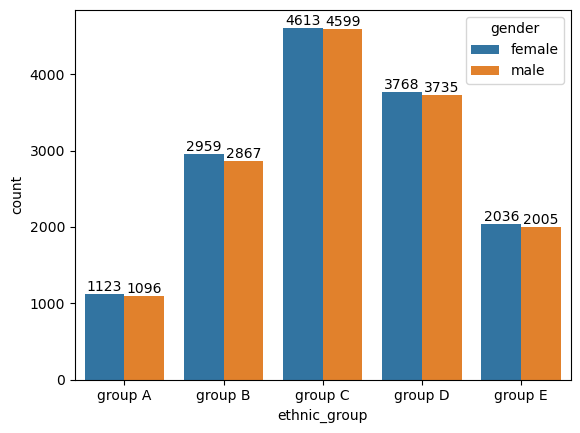

In [62]:
ax = sns.countplot(data=df, x='ethnic_group', hue='gender', order=['group A','group B','group C','group D','group E'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

**Conclusion:** Above chart shows that there is not much impact of gender on ethnic group distribution.

## 11. Analyze the impact of parent's education on scores

### Using dataframe

In [63]:
df_grouped_edu = df.groupby('parent_education')[['math_score','reading_score','writing_score']].mean().round(2)
df_grouped_edu

,math_score,reading_score,writing_score
parent_education,,,
associate's degree,68.37,71.12,70.30
bachelor's degree,70.47,73.06,73.33
high school,64.44,67.21,65.42
master's degree,72.34,75.83,76.36
some college,66.39,69.18,68.50
some high school,62.58,65.51,63.63


### Using SQL

In [64]:
%%capture --no-display
%%sql 
select parent_education, round(cast(avg(1.0 * math_score) as float), 2) avg_math_score, 
round(cast(avg(1.0 * reading_score) as float), 2) avg_reading_score,
round(cast(avg(1.0 * writing_score) as float), 2) avg_writing_score
from student_performance 
where parent_education is not null
group by parent_education
order by parent_education;

parent_education,avg_math_score,avg_reading_score,avg_writing_score
associate's degree,68.37,71.12,70.3
bachelor's degree,70.47,73.06,73.33
high school,64.44,67.21,65.42
master's degree,72.34,75.83,76.36
some college,66.39,69.18,68.5
some high school,62.58,65.51,63.63


### Plot the data using seaborn's heatmap

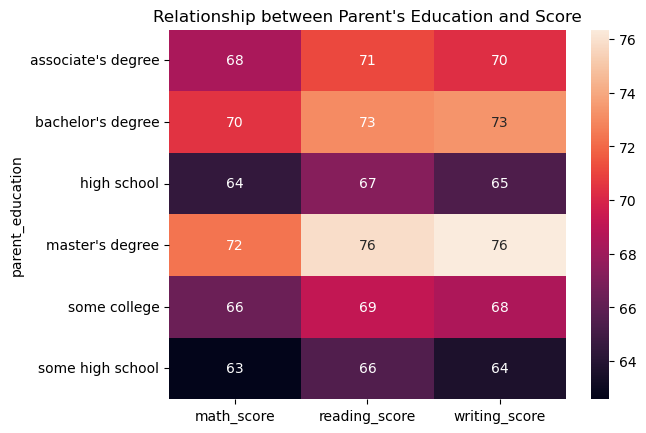

In [65]:
sns.heatmap(data=df_grouped_edu, annot=True)
plt.title('Relationship between Parent\'s Education and Score')
plt.show()

**Conclusion:** Above chart shows that parent's education does have impact on student's scores. Students scored better whose parents have higher education than high school. Students whose parents have done masters, scored highest in all subjects.

## 12. Analyze the impact of parent's marital status on scores

### Using dataframe

In [66]:
df_grouped_marital_sts = df.groupby('parent_marital_status').agg({'math_score':'mean','reading_score':'mean','writing_score':'mean'}).round(2)
df_grouped_marital_sts

,math_score,reading_score,writing_score
parent_marital_status,,,
divorced,66.69,69.66,68.80
married,66.66,69.39,68.42
single,66.17,69.16,68.17
widowed,67.37,69.65,68.56


### Using SQL

In [67]:
%%capture --no-display
%%sql 
select parent_marital_status, round(cast(avg(1.0 * math_score) as float), 2) avg_math_score, 
round(cast(avg(1.0 * reading_score) as float), 2) avg_reading_score,
round(cast(avg(1.0 * writing_score) as float), 2) avg_writing_score
from student_performance 
where parent_marital_status is not null
group by parent_marital_status
order by parent_marital_status;

parent_marital_status,avg_math_score,avg_reading_score,avg_writing_score
divorced,66.69,69.66,68.8
married,66.66,69.39,68.42
single,66.17,69.16,68.17
widowed,67.37,69.65,68.56


### Plot the data using seaborn's heatmap

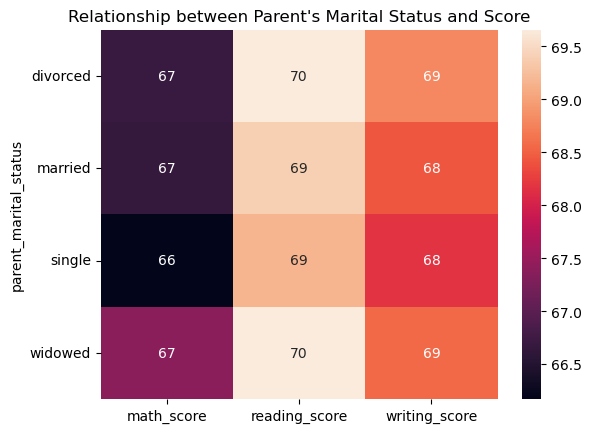

In [68]:
sns.heatmap(data=df_grouped_marital_sts, annot=True)
plt.title('Relationship between Parent\'s Marital Status and Score')
plt.yticks(rotation=0)
plt.show()

**Conclusion:** Above chart shows that parent's marital status does not have any impact on student's scores.

## 13. Analyze the impact of student's sports activity on scores

### Using dataframe

In [69]:
df_grouped_sports = df.groupby('practice_sport').agg({'math_score':'mean','reading_score':'mean','writing_score':'mean'}).round(2)
df_grouped_sports

,math_score,reading_score,writing_score
practice_sport,,,
never,64.17,68.34,66.52
regularly,67.84,69.94,69.60
sometimes,66.27,69.24,68.07


### Using SQL

In [70]:
%%capture --no-display
%%sql 
select practice_sport, round(cast(avg(1.0 * math_score) as float), 2) avg_math_score, 
round(cast(avg(1.0 * reading_score) as float), 2) avg_reading_score,
round(cast(avg(1.0 * writing_score) as float), 2) avg_writing_score
from student_performance 
where practice_sport is not null
group by practice_sport
order by practice_sport;

practice_sport,avg_math_score,avg_reading_score,avg_writing_score
never,64.17,68.34,66.52
regularly,67.84,69.94,69.6
sometimes,66.27,69.24,68.07


### Plot the data using seaborn's heatmap

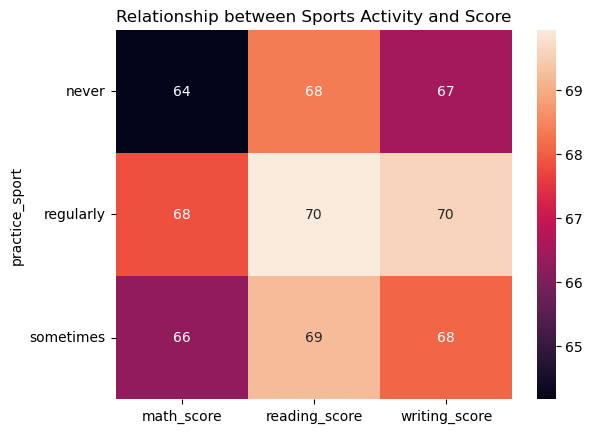

In [71]:
sns.heatmap(data=df_grouped_sports, annot=True)
plt.title('Relationship between Sports Activity and Score')
plt.yticks(rotation=0)
plt.show()

**Conclusion:** Above chart shows that students who play regularly, scored high in all subjects and students who never plays, scored lowest in all subjects.

## 14. Analyze the impact of student's weekly study hours on scores

### Using dataframe

In [72]:
df_grouped_hours = df.groupby('weekly_study_hours').agg({'math_score':'mean','reading_score':'mean','writing_score':'mean'}).round(2)
df_grouped_hours

,math_score,reading_score,writing_score
weekly_study_hours,,,
5 - 10,66.87,69.66,68.64
< 5,64.58,68.18,67.09
> 10,68.70,70.37,69.78


### Using SQL

In [73]:
%%capture --no-display
%%sql 
select weekly_study_hours, round(cast(avg(1.0 * math_score) as float), 2) avg_math_score, 
round(cast(avg(1.0 * reading_score) as float), 2) avg_reading_score,
round(cast(avg(1.0 * writing_score) as float), 2) avg_writing_score
from student_performance 
where weekly_study_hours is not null
group by weekly_study_hours
order by weekly_study_hours;

weekly_study_hours,avg_math_score,avg_reading_score,avg_writing_score
< 5,64.58,68.18,67.09
> 10,68.7,70.37,69.78
5 - 10,66.87,69.66,68.64


### Plot the data using seaborn's heatmap

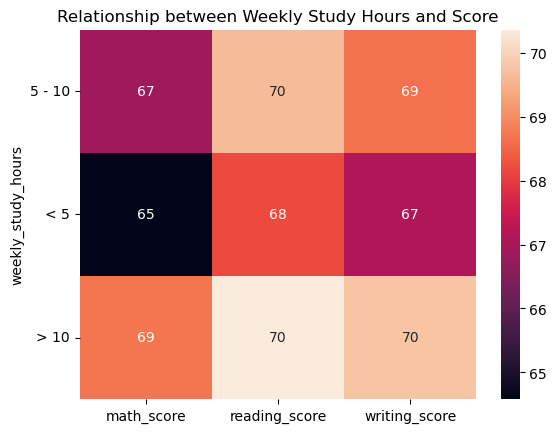

In [74]:
sns.heatmap(data=df_grouped_hours, annot=True)
plt.title('Relationship between Weekly Study Hours and Score')
plt.yticks(rotation=0)
plt.show()

**Conclusion:** Above chart shows that students who studied more than 10 hours have scored high in all subjects.
<br>
<br>
**Similarly, data can be further analyzed for lunch_type, test_preparation, is_first_child and transport_means columns.**

## 15. Detect outliers for math, reading and writing scores

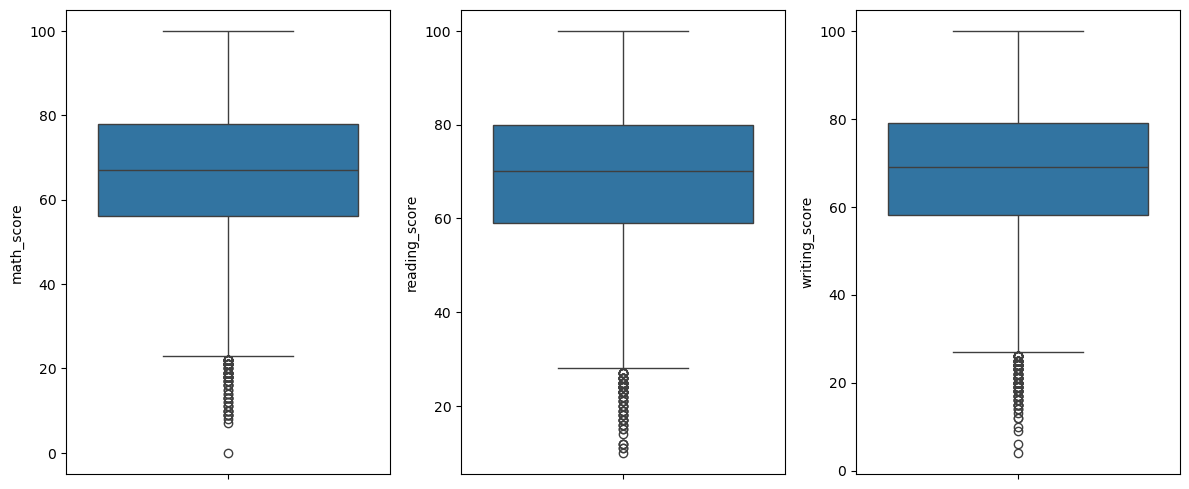

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
sns.boxplot(data=df, y='math_score', ax=axes[0])
sns.boxplot(data=df, y='reading_score', ax=axes[1])
sns.boxplot(data=df, y='writing_score', ax=axes[2])
plt.tight_layout()
plt.show()

**Conclusion:** Above charts show that students are comparitively weak in maths as there are students who have scored zero and minimum score is also low as compared to reading and writing.

## 16. Identify the correlation between scores

### Using dataframe

In [76]:
df_corr = df[['math_score','reading_score','writing_score']].corr()
df_corr

,math_score,reading_score,writing_score
math_score,1.000000,0.817825,0.807118
reading_score,0.817825,1.000000,0.952584
writing_score,0.807118,0.952584,1.000000


### Plot correlation data using seaborn's heatmap

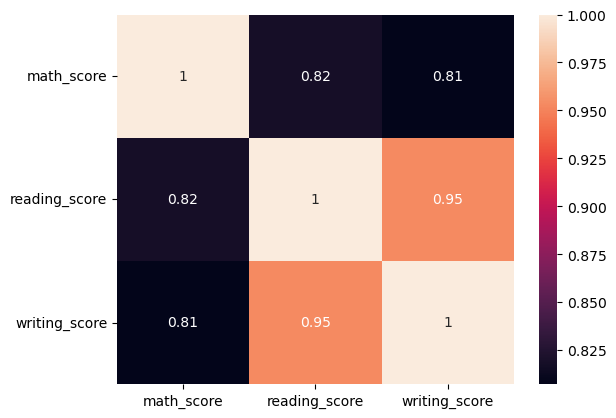

In [77]:
sns.heatmap(data=df_corr, annot=True)
plt.yticks(rotation=0)
plt.show()

### Plot correlation between scores using seaborn's scatterplot and matplotlib's subplot functionality

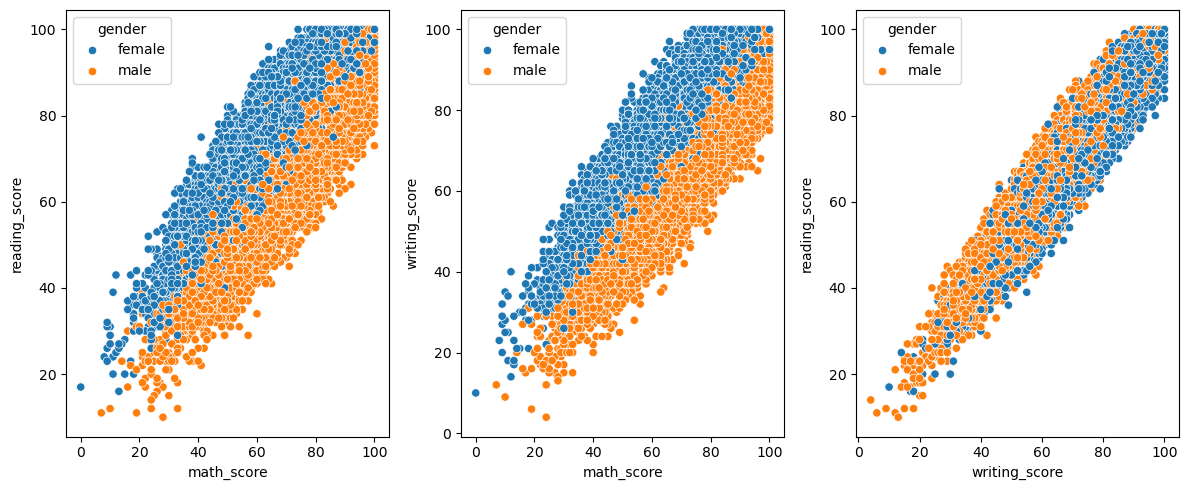

In [78]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,5))
sns.scatterplot(data=df, x='math_score', y='reading_score', hue='gender', ax=axes[0])
sns.scatterplot(data=df, x='math_score', y='writing_score', hue='gender', ax=axes[1])
sns.scatterplot(data=df, x='writing_score', y='reading_score', hue='gender', ax=axes[2])
plt.tight_layout()
plt.show()

**Conclusion:** Above charts show that math, reading and writing scores are positively correlated to each other. If students have scored good in 
maths then they have scored good in other subjects as well and vice versa.